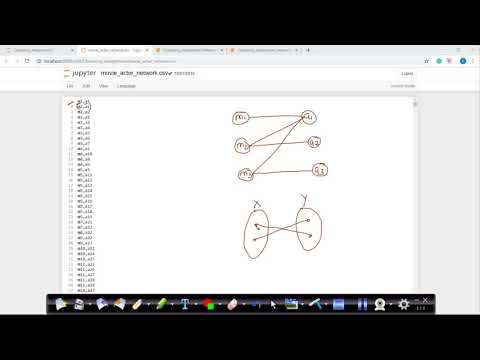

In [1]:
 from IPython.display import IFrame, YouTubeVideo
YouTubeVideo(id='_XJlZtZqMUs', width=600)

In [5]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [6]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [10]:
data

,movie,actor
0,m1,a1
1,m2,a1
2,m2,a2
3,m3,a1
4,m3,a3
...,...,...
9645,m1380,a816
9646,m1380,a962
9647,m1381,a1225
9648,m1381,a1436


In [11]:
edges = [tuple(x) for x in data.values.tolist()]

In [12]:
edges

[('m1', 'a1'),
 ('m2', 'a1'),
 ('m2', 'a2'),
 ('m3', 'a1'),
 ('m3', 'a3'),
 ('m3', 'a4'),
 ('m3', 'a5'),
 ('m3', 'a6'),
 ('m3', 'a7'),
 ('m4', 'a1'),
 ('m4', 'a10'),
 ('m4', 'a8'),
 ('m4', 'a9'),
 ('m5', 'a1'),
 ('m5', 'a11'),
 ('m5', 'a12'),
 ('m5', 'a13'),
 ('m5', 'a14'),
 ('m5', 'a15'),
 ('m5', 'a16'),
 ('m5', 'a17'),
 ('m5', 'a18'),
 ('m5', 'a19'),
 ('m7', 'a21'),
 ('m7', 'a22'),
 ('m8', 'a22'),
 ('m9', 'a22'),
 ('m9', 'a23'),
 ('m10', 'a22'),
 ('m10', 'a24'),
 ('m10', 'a25'),
 ('m11', 'a22'),
 ('m11', 'a26'),
 ('m11', 'a27'),
 ('m11', 'a28'),
 ('m11', 'a29'),
 ('m24', 'a47'),
 ('m25', 'a47'),
 ('m25', 'a48'),
 ('m25', 'a49'),
 ('m25', 'a50'),
 ('m25', 'a51'),
 ('m25', 'a52'),
 ('m25', 'a53'),
 ('m25', 'a54'),
 ('m25', 'a55'),
 ('m25', 'a56'),
 ('m25', 'a57'),
 ('m25', 'a58'),
 ('m25', 'a59'),
 ('m25', 'a60'),
 ('m25', 'a61'),
 ('m25', 'a62'),
 ('m25', 'a63'),
 ('m25', 'a64'),
 ('m25', 'a65'),
 ('m25', 'a66'),
 ('m25', 'a67'),
 ('m25', 'a68'),
 ('m25', 'a69'),
 ('m25', 'a70'),
 ('m

In [19]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [20]:
B

In [21]:
A = (B.subgraph(c) for c in nx.connected_components(B))

In [22]:
A = list(A)[0]

In [23]:
A

In [31]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


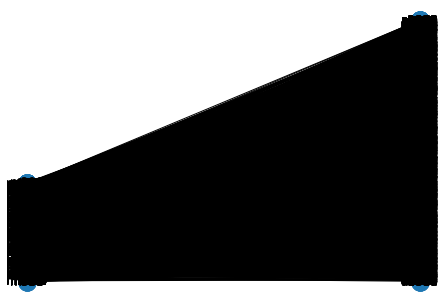

In [32]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

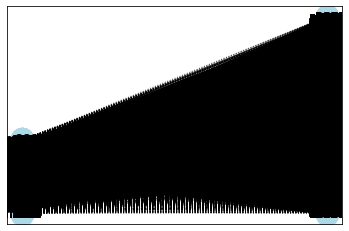

In [42]:
nx.draw_networkx(A, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

In [26]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [27]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [28]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [29]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [33]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.nodes[node_id]['label'] for node_id in node_ids]

In [76]:
node_ids

['a973',
 'a967',
 'a964',
 'a1731',
 'a970',
 'a969',
 'a965',
 'a1028',
 'a1003',
 'a1057',
 'm1094',
 'm1111',
 'a966',
 'm1100',
 'a988',
 'a959',
 'a1037',
 'a49',
 'a93',
 'm67',
 'm1095',
 'a962',
 'a971',
 'a963',
 'a1076',
 'a1030',
 'a977',
 'a960',
 'a1027',
 'a1016',
 'a204',
 'a768',
 'a631',
 'a968',
 'a472',
 'a1004',
 'a1020',
 'a407',
 'a1035',
 'a1026',
 'a2715',
 'm1001',
 'a975',
 'a1507',
 'a306',
 'a138',
 'm1114',
 'a972',
 'a1031',
 'm1096',
 'm376',
 'a1036',
 'm1112',
 'm1261',
 'm1106',
 'm1097',
 'm126',
 'm1272',
 'a1008',
 'm1022',
 'a987',
 'a1015',
 'a1435',
 'm1113',
 'a205',
 'm148',
 'm453',
 'm987',
 'a1467',
 'a1021',
 'a921',
 'a1038',
 'm1220',
 'm26',
 'm165',
 'm1213',
 'a782',
 'm1232',
 'm964',
 'm796',
 'a1011',
 'a1060',
 'm122',
 'm157',
 'm890',
 'a976',
 'm121',
 'a974',
 'a893',
 'm990',
 'a1750',
 'm616',
 'm924',
 'm1000',
 'a228',
 'm915',
 'm816',
 'm1045',
 'm154',
 'm430',
 'a1005',
 'm25',
 'm129',
 'm1284',
 'm1023',
 'a1436',
 '

In [78]:
A.nodes['m1']['label']

'movie'

In [36]:
node_ids

['a973',
 'a967',
 'a964',
 'a1731',
 'a970',
 'a969',
 'a965',
 'a1028',
 'a1003',
 'a1057',
 'm1094',
 'm1111',
 'a966',
 'm1100',
 'a988',
 'a959',
 'a1037',
 'a49',
 'a93',
 'm67',
 'm1095',
 'a962',
 'a971',
 'a963',
 'a1076',
 'a1030',
 'a977',
 'a960',
 'a1027',
 'a1016',
 'a204',
 'a768',
 'a631',
 'a968',
 'a472',
 'a1004',
 'a1020',
 'a407',
 'a1035',
 'a1026',
 'a2715',
 'm1001',
 'a975',
 'a1507',
 'a306',
 'a138',
 'm1114',
 'a972',
 'a1031',
 'm1096',
 'm376',
 'a1036',
 'm1112',
 'm1261',
 'm1106',
 'm1097',
 'm126',
 'm1272',
 'a1008',
 'm1022',
 'a987',
 'a1015',
 'a1435',
 'm1113',
 'a205',
 'm148',
 'm453',
 'm987',
 'a1467',
 'a1021',
 'a921',
 'a1038',
 'm1220',
 'm26',
 'm165',
 'm1213',
 'a782',
 'm1232',
 'm964',
 'm796',
 'a1011',
 'a1060',
 'm122',
 'm157',
 'm890',
 'a976',
 'm121',
 'a974',
 'a893',
 'm990',
 'a1750',
 'm616',
 'm924',
 'm1000',
 'a228',
 'm915',
 'm816',
 'm1045',
 'm154',
 'm430',
 'a1005',
 'm25',
 'm129',
 'm1284',
 'm1023',
 'a1436',
 '

In [38]:
node_embeddings[0]

array([ 2.55681229e+00,  8.70399058e-01,  9.43959594e-01, -1.51712283e-01,
       -4.60070699e-01, -2.48288676e-01,  1.06721556e+00,  2.35931373e+00,
       -4.70386595e-01, -1.17538023e+00, -3.68250489e-01, -6.94813490e-01,
        1.20830216e-01,  6.44729435e-01,  2.31413450e-03,  9.70330238e-01,
       -2.59256506e+00,  1.24331188e+00, -7.19500422e-01, -1.26907170e-01,
        1.04025710e+00,  5.77723682e-01, -3.19774330e-01,  1.30639660e+00,
        7.26935208e-01, -6.85000896e-01,  1.38640657e-01, -8.23140204e-01,
       -4.67859060e-02,  8.09246242e-01,  1.42252946e+00,  1.65937269e+00,
       -6.17587447e-01, -1.47627544e+00,  8.04560542e-01,  1.10096955e+00,
       -1.34576309e+00,  1.31357336e+00, -2.83248329e+00,  6.10861517e-02,
        4.05959249e-01, -1.36501944e+00, -1.84273279e+00,  1.61341965e+00,
        2.97469288e-01, -5.01475275e-01, -7.55725086e-01,  2.68450356e+00,
       -2.45019183e-01,  2.63229817e-01, -7.85374701e-01,  1.28105688e+00,
        5.76434731e-01,  

In [41]:
len(node_targets)

4703

In [34]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

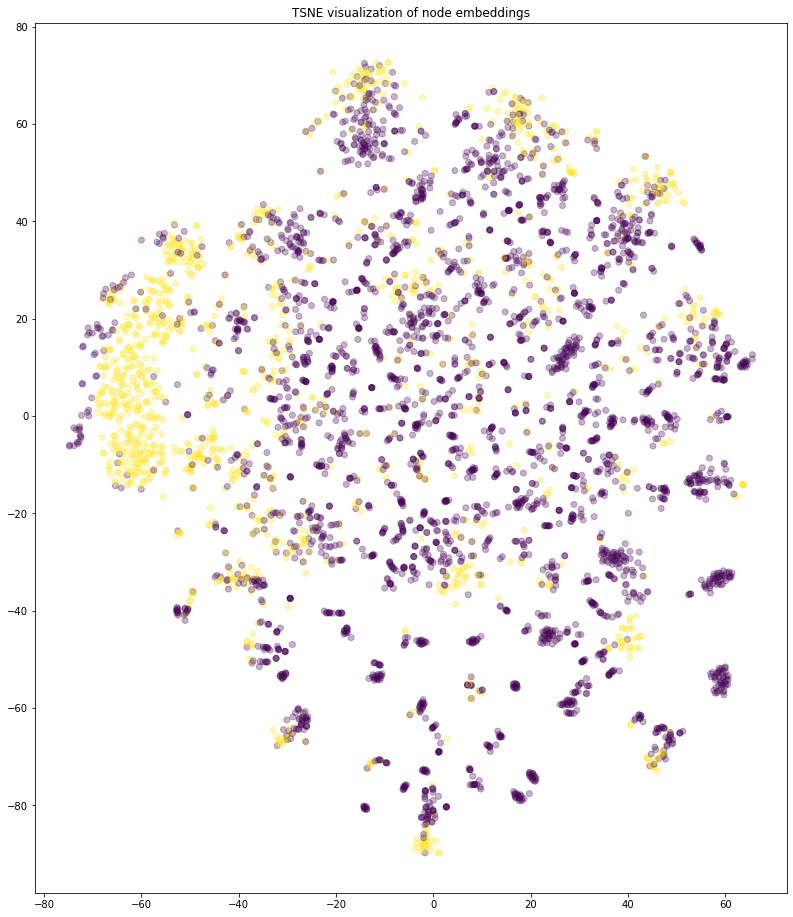

In [35]:
import numpy as np
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [ label_map[target] for target in node_targets]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

In [61]:
x = [0,1,0,0,0,1,1,1,1]
y = ['a','b','c','d','e','f','g','h','i']

In [62]:
k = zip(x,y)

In [63]:
for i,j in k:
    print(i,j)

0 a
1 b
0 c
0 d
0 e
1 f
1 g
1 h
1 i


In [73]:
x = [0,1,0,0,0,1,1,1,1]
y = ['a','b','c','d','e','f','g','h','i']


list_cluster = []
for m in range(2):
    cluster =[]
    for i,j in zip(x,y):
        if i==m:
            cluster.append(j)
        
    list_cluster.append(cluster)

In [74]:
list_cluster

[['a', 'c', 'd', 'e'], ['b', 'f', 'g', 'h', 'i']]